In [ ]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#11ff66','#6611ff','Wallpoet','Orbitron',20,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+"""; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [ ]:
dhtml('Code Modules, Setting, & Functions')

In [ ]:
import warnings,imageio,urllib
import tensorflow as tf,pylab as pl
import pandas as pd,numpy as np
import tensorflow.keras.layers as tkl
import tensorflow.keras.utils as tku
import tensorflow.keras.callbacks as tkc
import tensorflow_datasets as tfds
from sklearn.metrics import \
classification_report,confusion_matrix
from IPython.core.magic import register_line_magic

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('precision',3)
tf.keras.backend.set_floatx('float64')
tfds.disable_progress_bar()
fpath='https://olgabelitskaya.github.io/'
fn1,fn2='flower.png','cat.png'
fw='weights.best.hdf5'
buffer_size,batch_size=500,128
pixels,pixels2=64,128
num_classes=5

In [ ]:
def show2(img1,img2):
    pl.subplot(1,2,1); pl.imshow(img1)
    pl.subplot(1,2,2); pl.imshow(img2)
    pl.show()
def preprocess(item,img_size):
    img,lbl=item['image'],item['label']
    img_cropped=tf.image.central_crop(img,.95)
    img_resized=tf.image.resize(
        img_cropped,size=(img_size,img_size))
    img_flip=tf.image\
    .random_flip_left_right(img_resized)
    return (img_flip/255.,tf.cast(lbl,tf.int32))
@register_line_magic
def display_examples(pars):
    pars=pars.split()
    data,n=pars[0],int(pars[1])
    if data=='cats_vs_dogs': data=cvd_test
    if data=='tf_flowers': data=flower_test
    batch=next(iter(data.batch(n)))
    images=batch[0].numpy()
    labels=batch[1].numpy() 
    fig=pl.figure(figsize=(2*n//3,4.5))
    for i in range(n):
        ax=fig.add_subplot(3,n//3,i+1)
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(images[i])
        ax.text(.85,.15,'{}'.format(labels[i]), 
                fontdict={'color':c1,'fontsize':30},
                horizontalalignment='center',
                verticalalignment='center', 
                transform=ax.transAxes)
    pl.show()

In [ ]:
@register_line_magic
def history_plot(yes):
    global history
    pl.figure(figsize=(10,10)); pl.subplot(211)
    keys=list(history.history.keys())[0:4]
    pl.plot(history.history[keys[0]],
            color=c1,label='train')
    pl.plot(history.history[keys[2]],
            color=c2,label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Loss")
    pl.legend(); pl.grid()
    pl.title('Loss Function')     
    pl.subplot(212)
    pl.plot(history.history[keys[1]],
            color=c1,label='train')
    pl.plot(history.history[keys[3]],
            color=c2,label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Accuracy")    
    pl.legend(); pl.grid()
    pl.title('Accuracy'); pl.show()
def cb(fw):
    early_stopping=\
    tkc.EarlyStopping(monitor='val_loss',
                      patience=20,verbose=2)
    checkpointer=\
    tkc.ModelCheckpoint(filepath=fw,
                        save_best_only=True,verbose=2)
    lr_reduction=\
    tkc.ReduceLROnPlateau(monitor='val_loss',verbose=2,
                          patience=5,factor=.75)
    return [checkpointer,early_stopping,
            lr_reduction]

In [ ]:
@register_line_magic
def display_reports(d):
    global model,fw,buffer_size,c2,f2,fs2
    model.load_weights(fw)
    if d=='cats_vs_dogs': data=cvd_test
    if d=='tf_flowers': data=flower_test
    test_results=model.evaluate(data.batch(buffer_size))
    dhtml('\ntest accuracy: {:.2f}%'\
          .format(test_results[1]*100),
          c2,f2,fs2)
    batch=next(iter(data.batch(buffer_size)))
    y_test=batch[1].numpy()
    py_test=model.predict(data.batch(buffer_size))
    if d=='cats_vs_dogs':
        py_test=tf.sigmoid(py_test)\
                  .numpy().round()
    if d=='tf_flowers':
        py_test=np.argmax(tf.nn.softmax(py_test)\
                            .numpy(),axis=-1)
    py_test=py_test[:buffer_size]
    dhtml('Classification Report',c2,f2,fs2)
    print(classification_report(y_test,py_test))
    dhtml('Confusion Matrix',c2,f2,fs2)
    print(confusion_matrix(y_test,py_test))

In [ ]:
dhtml('Image Structure')

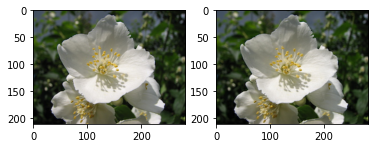

,imageio,tensorflow.io
shape,"[211, 282, 3]","[211, 282, 3]"
dtype,uint8,<dtype: 'uint8'>
rank,3,3


In [ ]:
input_file=urllib.request.urlopen(fpath+fn1)
output_file=open(fn1,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
imgii=imageio.imread(fn1)
imgtf=tf.image.decode_image(tf.io.read_file(fn1))
show2(imgii,imgtf)
pd.DataFrame([[tf.shape(imgii).numpy(),tf.shape(imgtf).numpy()],
              [imgii.dtype,imgtf.dtype],
              [tf.rank(imgii).numpy(),tf.rank(imgtf).numpy()]],
             index=['shape','dtype','rank'],
             columns=['imageio','tensorflow.io'])

In [ ]:
dhtml('Image Processing')

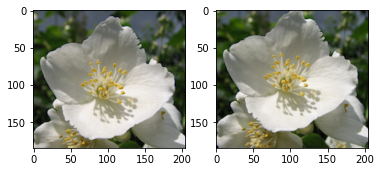

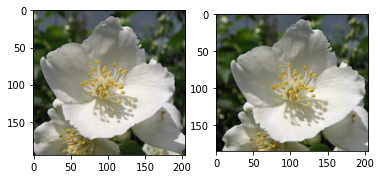

In [ ]:
def bcrop(img,box):
    return tf.image.crop_to_bounding_box(
        img,box[0],box[1],box[2],box[3])
show2(bcrop(imgii,[0,35,185,205]),
      bcrop(imgtf,[10,35,185,205]))
show2(bcrop(imgii,[0,35,195,205]),
      bcrop(imgtf,[0,25,185,205]))

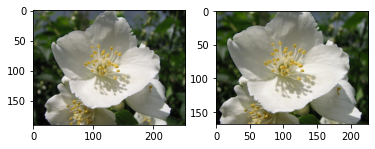

In [ ]:
def ccrop(img,c):
    return tf.image.central_crop(img,c)
show2(ccrop(imgii,.9),ccrop(imgtf,.8))

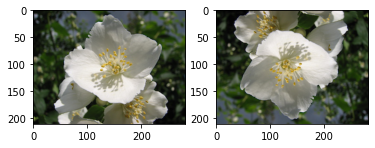

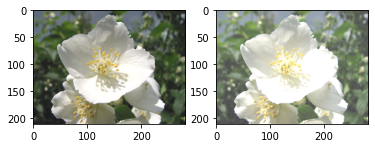

In [ ]:
def hflip(img):
    return tf.image.flip_left_right(img)
def vflip(img):
    return tf.image.flip_up_down(img)
def bright(img,d):
    return tf.image.adjust_brightness(
        img,delta=d)
show2(hflip(imgii),vflip(imgii))
show2(bright(imgii,.1),bright(imgtf,.3))

In [ ]:
dhtml('Data Processing')

In [ ]:
cvd=tfds.builder('cats_vs_dogs:4.0.0')
cvd.download_and_prepare()
split=['train[:80%]','train[80%:90%]','train[90%:]']
ds=cvd.as_dataset(shuffle_files=False,split=split)
cvd_train=ds[0].map(lambda x: preprocess(x,img_size=pixels))
cvd_valid=ds[1].map(lambda x: preprocess(x,img_size=pixels))
cvd_test=ds[2].map(lambda x: preprocess(x,img_size=pixels))
ncvd_train=int(cvd.info.splits['train[:80%]'].num_examples)
dhtml(str(ncvd_train),c2,f2,fs2)

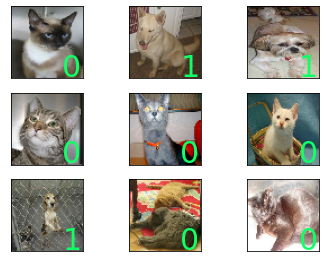

In [ ]:
dhtml(cvd.info.features['image'],c2,f2,fs2)
dhtml(cvd.info.features['label'],c2,f2,fs2)
%display_examples cats_vs_dogs 9

In [ ]:
cvd_train=cvd_train\
.shuffle(buffer_size=buffer_size).repeat()
cvd_train=cvd_train.batch(batch_size)
cvd_valid=cvd_valid.batch(batch_size)

In [ ]:
flower=tfds.builder('tf_flowers')
flower.download_and_prepare()
split=['train[:80%]','train[80%:90%]','train[90%:]']
ds=flower.as_dataset(shuffle_files=False,split=split)
flower_train=ds[0].map(lambda x: preprocess(x,img_size=pixels2))
flower_valid=ds[1].map(lambda x: preprocess(x,img_size=pixels2))
flower_test=ds[2].map(lambda x: preprocess(x,img_size=pixels2))
nflower_train=int(flower.info.splits['train[:80%]'].num_examples)
dhtml(str(nflower_train),c2,f2,fs2)

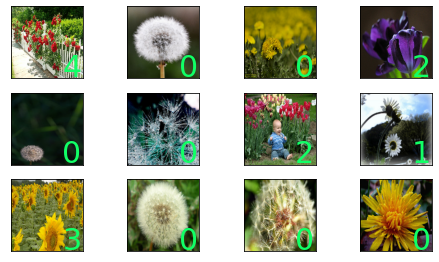

In [ ]:
dhtml(flower.info.features['image'],c2,f2,fs2)
dhtml(flower.info.features['label'],c2,f2,fs2)
%display_examples tf_flowers 12

In [ ]:
flower_train=flower_train\
.shuffle(buffer_size=buffer_size).repeat()
flower_train=flower_train.batch(batch_size)
flower_valid=flower_valid.batch(batch_size)

In [ ]:
dhtml('CNN Binary Classification')

In [ ]:
def convb(model,f,ks,d):
    model.add(tkl.Conv2D(
    filters=f,kernel_size=(ks,ks),
    strides=(1,1),padding='same'))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.MaxPool2D(pool_size=(2,2)))
    model.add(tkl.Dropout(d))

In [ ]:
model=tf.keras.Sequential()
model.add(tkl.Input((pixels,pixels,3),
                    name='input'))
convb(model,32,5,.2)
convb(model,128,5,.2)
convb(model,512,5,.2)
model.compute_output_shape(
    input_shape=(batch_size,pixels,pixels,3))

TensorShape([128, 8, 8, 512])

In [ ]:
model.add(tkl.GlobalAveragePooling2D())   
model.add(tkl.Dense(2048))
model.add(tkl.LeakyReLU(alpha=.02))
model.add(tkl.Dropout(.5))
model.add(tkl.Dense(1,activation=None))
model.compute_output_shape(
    input_shape=(batch_size,pixels,pixels,1))

TensorShape([128, 1])

In [ ]:
steps_per_epoch=np.ceil(ncvd_train/batch_size)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses\
              .BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(cvd_train,epochs=50,shuffle=True, 
                  validation_data=cvd_valid,
                  callbacks=cb(fw),
                  steps_per_epoch=steps_per_epoch)

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.5487
Epoch 00001: val_loss improved from inf to 0.68197, saving model to weights.best.hdf5
146/146 [==============================] - 135s 925ms/step - loss: 0.6735 - accuracy: 0.5487 - val_loss: 0.6820 - val_accuracy: 0.4914
Epoch 2/50
146/146 [==============================] - ETA: 0s - loss: 0.6401 - accuracy: 0.6001
Epoch 00002: val_loss improved from 0.68197 to 0.62185, saving model to weights.best.hdf5
146/146 [==============================] - 133s 913ms/step - loss: 0.6401 - accuracy: 0.6001 - val_loss: 0.6219 - val_accuracy: 0.5765
Epoch 3/50
146/146 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.6522
Epoch 00003: val_loss improved from 0.62185 to 0.56967, saving model to weights.best.hdf5
146/146 [==============================] - 134s 920ms/step - loss: 0.5942 - accuracy: 0.6522 - val_loss: 0.5697 - val_accuracy: 0.6341
Epoch 4/50
146/146 [=====================

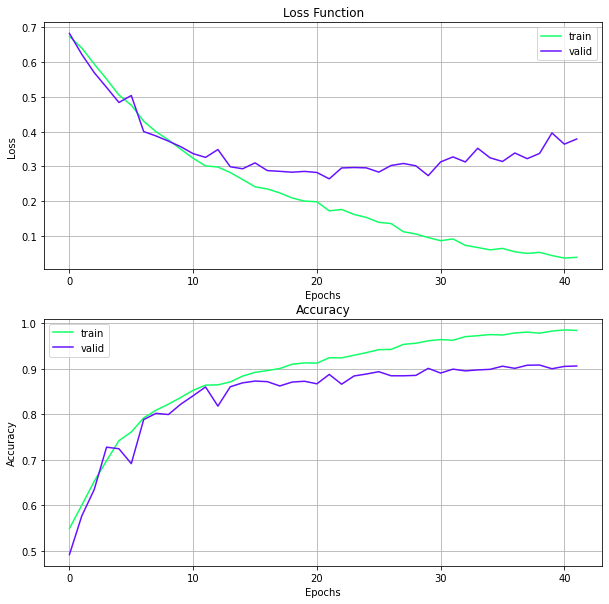

In [ ]:
%history_plot yes 

In [ ]:
%display_reports cats_vs_dogs

5/5 [==============================] - 14s 3s/step - loss: 0.2381 - accuracy: 0.9063


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       256
           1       0.89      0.91      0.90       244

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



[[230  26]
 [ 23 221]]


In [ ]:
dhtml('CNN Classification')

In [ ]:
model=tf.keras.Sequential()
model.add(tkl.Input((pixels2,pixels2,3),
                    name='input'))
convb(model,32,5,.2)
convb(model,64,5,.2)
convb(model,128,5,.2)
convb(model,256,5,.2)
model.compute_output_shape(
    input_shape=(batch_size,pixels2,pixels2,3))

TensorShape([128, 8, 8, 256])

In [ ]:
model.add(tkl.GlobalAveragePooling2D())   
model.add(tkl.Dense(4096))
model.add(tkl.LeakyReLU(alpha=.02))
model.add(tkl.Dropout(.5))
model.add(tkl.Dense(num_classes,activation=None))
model.compute_output_shape(
    input_shape=(batch_size,pixels2,pixels2,3))

TensorShape([128, 5])

In [ ]:
steps_per_epoch=np.ceil(nflower_train/batch_size)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses\
              .SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(flower_train,epochs=50,shuffle=True, 
                  validation_data=flower_valid,
                  callbacks=cb(fw),
                  steps_per_epoch=steps_per_epoch)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 1.5767 - accuracy: 0.2677
Epoch 00001: val_loss improved from inf to 1.45850, saving model to weights.best.hdf5
23/23 [==============================] - 32s 1s/step - loss: 1.5767 - accuracy: 0.2677 - val_loss: 1.4585 - val_accuracy: 0.3678
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 1.3513 - accuracy: 0.3869
Epoch 00002: val_loss improved from 1.45850 to 1.29265, saving model to weights.best.hdf5
23/23 [==============================] - 29s 1s/step - loss: 1.3513 - accuracy: 0.3869 - val_loss: 1.2927 - val_accuracy: 0.3869
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 1.2313 - accuracy: 0.4572
Epoch 00003: val_loss improved from 1.29265 to 1.16758, saving model to weights.best.hdf5
23/23 [==============================] - 29s 1s/step - loss: 1.2313 - accuracy: 0.4572 - val_loss: 1.1676 - val_accuracy: 0.4687
Epoch 4/50
23/23 [==============================] - ETA: 0s - los

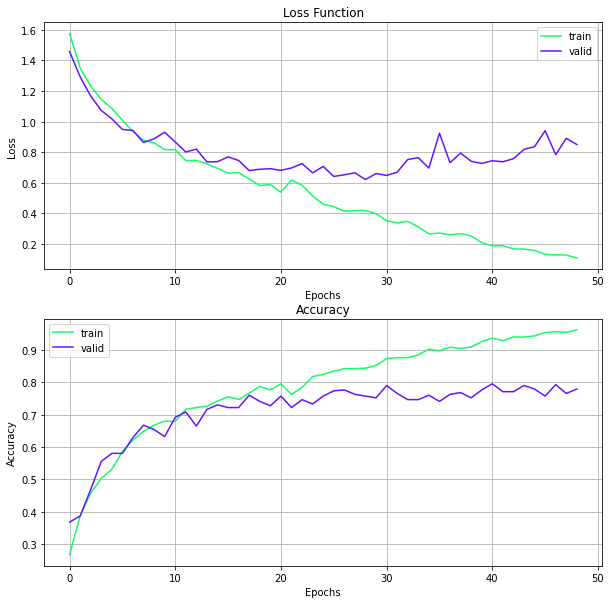

In [ ]:
%history_plot yes

In [ ]:
%display_reports tf_flowers

1/1 [==============================] - 0s 10ms/step - loss: 0.4947 - accuracy: 0.8365


              precision    recall  f1-score   support

           0       0.80      0.96      0.87        70
           1       0.84      0.85      0.85        61
           2       0.80      0.78      0.79        85
           3       0.95      0.92      0.93        76
           4       0.81      0.69      0.75        75

    accuracy                           0.84       367
   macro avg       0.84      0.84      0.84       367
weighted avg       0.84      0.84      0.83       367



[[67  1  0  2  0]
 [ 4 52  2  1  2]
 [ 2  6 66  1 10]
 [ 3  1  2 70  0]
 [ 8  2 13  0 52]]
